# **CHAPTER 4.1. Densoviruses — synteny analysis**

**Install conda env and activate it**

```
conda env create -f denso_synteny.yaml
```

```
conda activate denso_synteny
```

>Unfortunatelly, during working on this project, I had to switch from `UbuntuOS` to `macOS`.<br>
>Yet, I had to add some analysis to the study. But, I could not continue to work in previous envinronment.<br>
>`macOS 15.3.1` does not support `Prokka` in any case — even using `osx-64 conda subdir`.<br>
>That is why whi `045_pyGenomeViz_journal.ipynb` notebook and `denso_synteny.yaml` exist.

Import everything

In [13]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.align import MUMmer
from pathlib import PosixPath

Download _Parus major densovirus_ genome in `.gbk` format

In [10]:
! esearch -db nucleotide \
    -query 'NC_031450' \
    | efetch -format gb > prokka_results/Parus.gbk

Download _Tenebrio molitor densovirus_ genome in `.gbk` format

In [11]:
! esearch -db nucleotide \
    -query 'MW628494' \
    | efetch -format gb > prokka_results/Tenebrio.gbk

Create a list of input files for `pyGenomeViz`<br>
I had to hardcode it to adjust the order of genomes on plot

In [ ]:
# Reordering the list
gbk_files = [
    PosixPath('prokka_results/Parus.gbk'),
    PosixPath('prokka_results/Tenebrio.gbk'),
    PosixPath('prokka_results/annotated_densovirus_D3/Densovirus_D3_annot.gbk'),
    PosixPath('prokka_results/annotated_densovirus_P2/Densovirus_P2_annot.gbk'),
    PosixPath('prokka_results/annotated_densovirus_D1/Densovirus_D1_annot.gbk'),
    PosixPath('prokka_results/annotated_densovirus_D2/Densovirus_D2_annot.gbk'),
    PosixPath('prokka_results/annotated_densovirus_D4/Densovirus_D4_annot.gbk'),
    PosixPath('prokka_results/annotated_densovirus_D5/Densovirus_D5_annot.gbk'),
    PosixPath('prokka_results/annotated_densovirus_P1/Densovirus_P1_annot.gbk'),
    PosixPath('prokka_results/annotated_densovirus_P3/Densovirus_P3_annot.gbk'),
    PosixPath('prokka_results/annotated_densovirus_P4/Densovirus_P4_annot.gbk'),
    PosixPath('prokka_results/annotated_densovirus_P5/Densovirus_P5_annot.gbk')
]

gbk_list = list(map(Genbank, gbk_files))

Run `pyGenomeViz`!

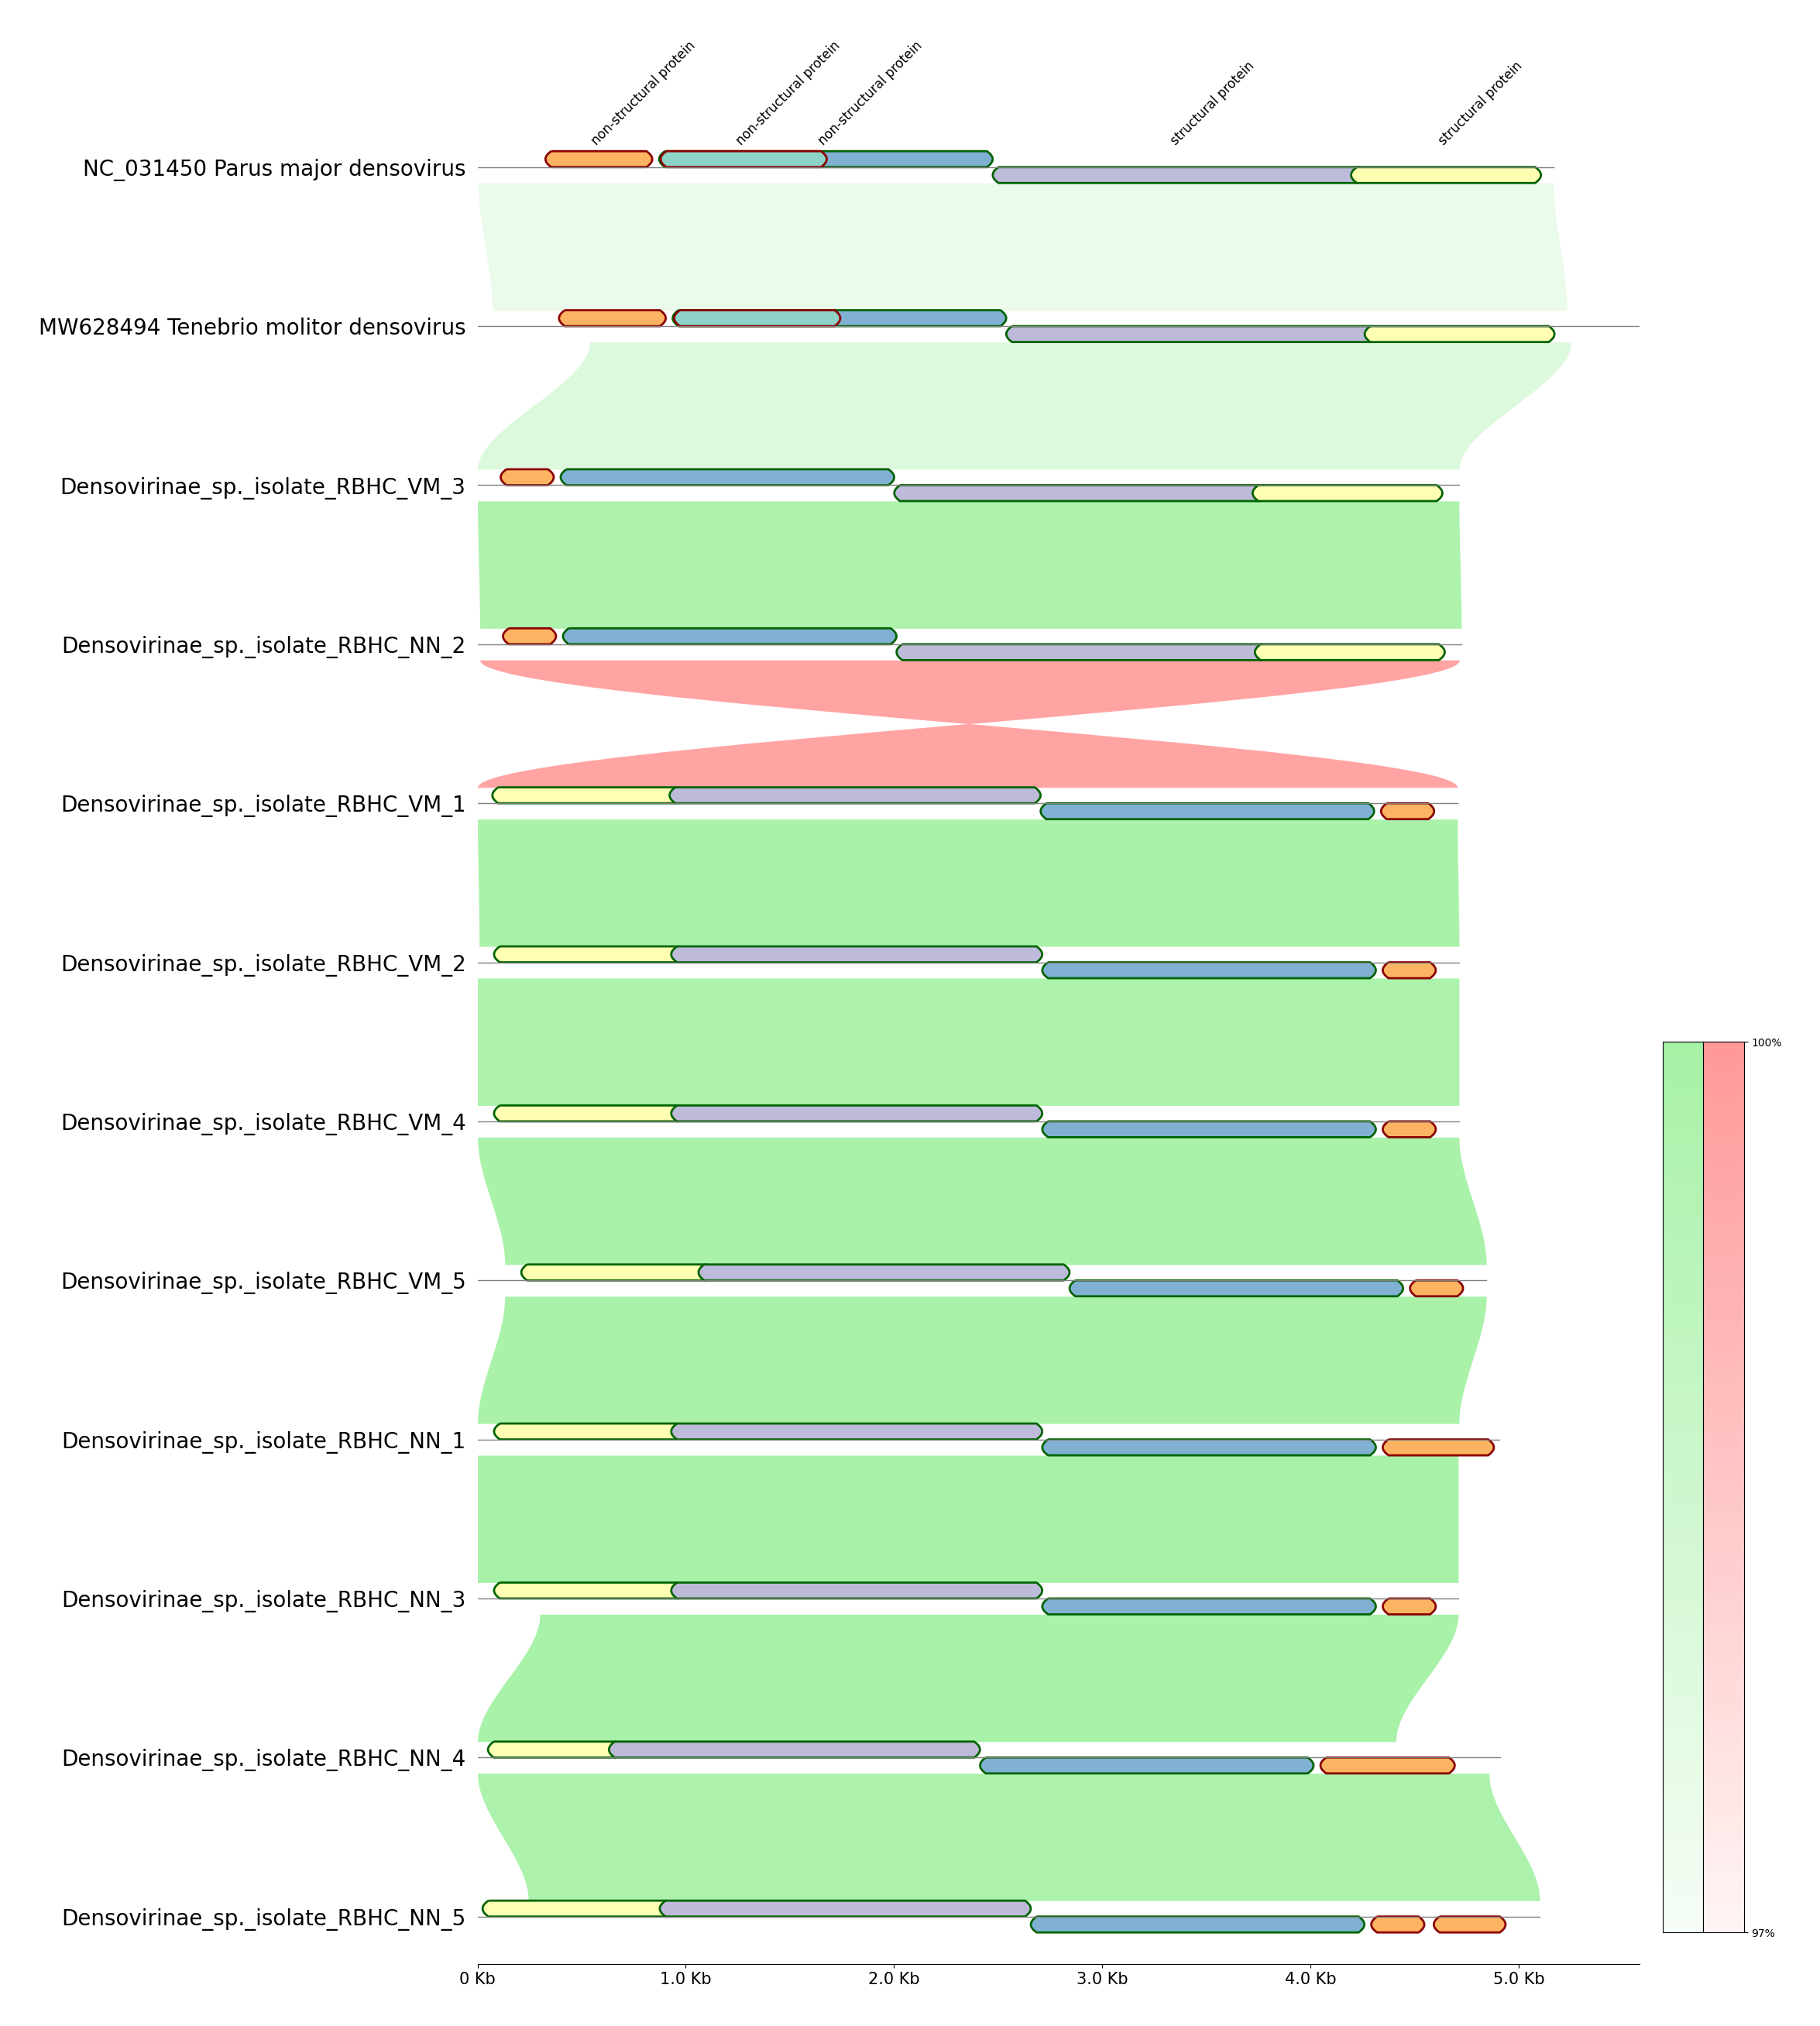

In [27]:
gv = GenomeViz()
gv.set_scale_xticks()

# Plot CDS, rRNA features for each contig to tracks
for i, gbk in enumerate(gbk_list):
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=True)
    if track.name == "Parus":
        track.set_label("NC_031450 Parus major densovirus")
    if track.name == "Tenebrio":
        track.set_label("MW628494 Tenebrio molitor densovirus")
    if track.name == "Densovirus_D1_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_VM_1")
    if track.name == "Densovirus_D2_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_VM_2")
    if track.name == "Densovirus_D3_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_VM_3")
    if track.name == "Densovirus_D4_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_VM_4")
    if track.name == "Densovirus_D5_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_VM_5")
    if track.name == "Densovirus_P1_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_NN_1")
    if track.name == "Densovirus_P2_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_NN_2")
    if track.name == "Densovirus_P3_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_NN_3")
    if track.name == "Densovirus_P4_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_NN_4")
    if track.name == "Densovirus_P5_annot":
        track.set_label("Densovirinae_sp._isolate_RBHC_NN_5")
    for seqid, features in gbk.get_seqid2features(None).items():
        segment = track.get_segment(seqid)
        for feature in features:
            if feature.type == "CDS":
                # Set color based on the "product" qualifier
                product_name = str(feature.qualifiers.get("product", [""])[0])
                if product_name.startswith("ORF1"):
                    fc_color = "#bebada" #light-purple
                    ec_color = "#006400" #dark-green
                elif product_name.startswith("structural") or product_name.startswith("ORF2"):
                    fc_color = "#ffffb3" #light-yellow
                    ec_color = "#006400" #dark-green
                elif product_name.startswith("non-structural") or product_name.startswith("ORF3"):
                    fc_color = "#80b1d3" #dark-blue
                    ec_color = "#006400" #dark-green
                elif product_name.startswith("ORF5") or product_name.startswith("hypothetical"):
                    fc_color = "#fdb462" #light-orange
                    ec_color = "#8B0000" #dark-red
                elif product_name.startswith("ORF4"):
                    fc_color = "#8dd3c7" #light-blue
                    ec_color = "#8B0000" #dark-red
                else:
                    fc_color = "yellow"  # Default color for other CDS
                
                # Adjust behavior for the first gbk in the list
                if i == 0:  # First gbk in the list
                    segment.add_features(feature, fc=fc_color, plotstyle="rbox", label_type="note", ec=ec_color, lw=2.0)
                else:  # Other gbks
                    segment.add_features(feature, fc=fc_color, plotstyle="rbox", ec=ec_color, lw=2.0)
            elif feature.type == "rRNA":
                # rRNA: lime
                segment.add_features(feature, fc="lime", plotstyle="rbox", lw=2.0)

# Run MUMmer alignment
align_coords = MUMmer(gbk_list).run()

# Plot MUMmer alignment links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "#90ee90", "#FF7F7F"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident, curve=True)
    gv.set_colorbar([color, inverted_color], vmin=min_ident, bar_height = 0.5, bar_width = 0.035)

fig = gv.plotfig()

Save the figure!

In [28]:
fig.set_size_inches(14, 20)
fig.savefig("images/synteny_plot.png", dpi=600, bbox_inches="tight")